In [15]:
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
FILENAME = 'Cell 1 ctrl 4m.abf'

In [3]:
#series according to the protocol

# colors = {
#     'CTRL': (13, 23, 'green'),
#     'GABA1': (43, 53, 'blue'),
#     'GABA5': (63, 77, 'navy'),
#     'PTX': (89, 99, 'red')
# }

colors = {
    'CTRL': (0, 30, 'green'),
    'GABA1': (54, 72, 'blue'),
    'GABA5': (100, 118, 'navy'),
    'PTX': (162, 198, 'red')
}

In [4]:
step = (5, 0.1, 0.7) #voltage, start, stop

Read file

In [5]:
io = neo.io.get_io(FILENAME)
block = io.read_block()
block2= io.read_block()
block3 = io.read_block()
block4 = io.read_block()
#creating dir
if os.path.exists(FILENAME.split('.abf')[0]):
    pass
else:
    os.mkdir(FILENAME.split('.abf')[0])

ignoring buggy nTelegraphEnable


In [6]:
abf = pyabf.ABF(FILENAME)
Sweep_number = abf.sweepCount
SamplingRate = block.segments[0].analogsignals[0].sampling_rate.item()
raw_signal = block.segments[0].analogsignals[0].base.T
times = [i / block.segments[0].analogsignals[0].sampling_rate.item() for i in range(len(raw_signal[0]))] 
len_recording_time = len(raw_signal[0])/SamplingRate
sweep_length = int(abf.sweepIntervalSec)

In [7]:
Sweep_number

180

Baseline correction

In [8]:
baseline = baselinecorrection(raw_signal)

In [9]:
corrected_signal = np.array(raw_signal)[0] - baseline[0]
corrected_signal_sweeps = {k: corrected_signal[int(k * sweep_length * SamplingRate):int((k+1) * sweep_length  * SamplingRate)] 
                            for k in range(Sweep_number)}
corrected_signal_sweeps_no_res_part = {k: corrected_signal[int((k * sweep_length + step[2]) * SamplingRate):int(((k+1) * sweep_length)* SamplingRate)] 
                                       for k in range(Sweep_number)}

### Electric cell parameters

In [10]:
r_s_dict = series_res(raw_signal, sweep_length, step, SamplingRate, Sweep_number, baseline)

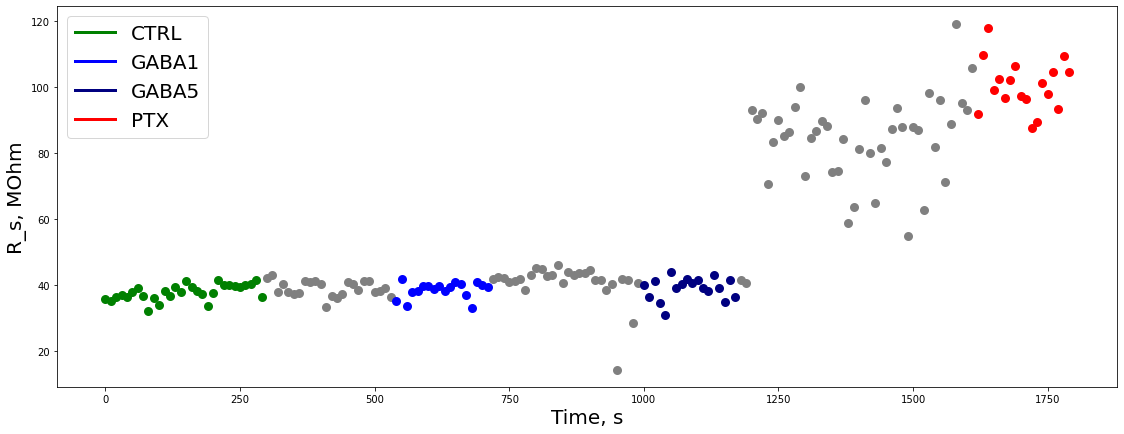

In [12]:
plt = plot_el_param(r_s_dict, sweep_length, SamplingRate, colors)
plt.savefig(f"{FILENAME.split('.abf')[0]}/rs.png")
plt.savefig(f"{FILENAME.split('.abf')[0]}/rs.pdf")

In [16]:
r_in_dict = input_res(baseline, sweep_length, step, SamplingRate, Sweep_number, r_s_dict)

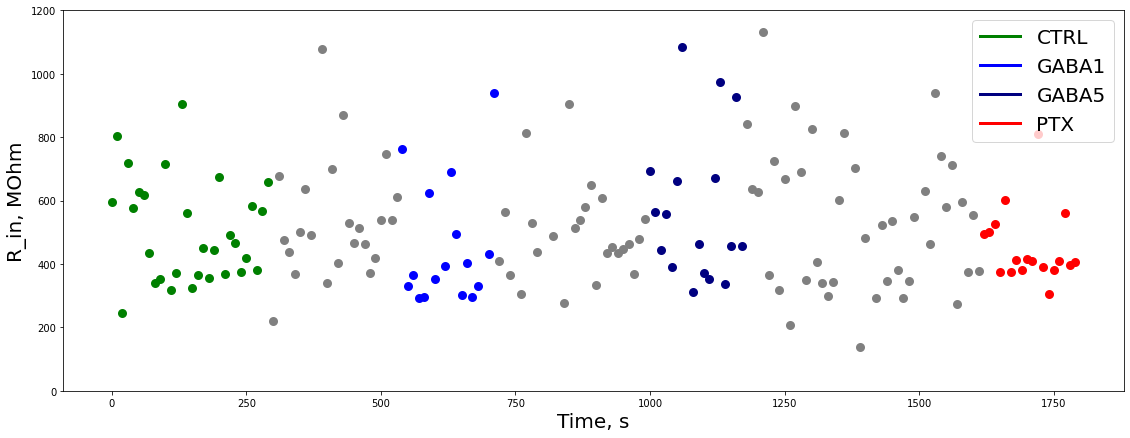

<Figure size 432x288 with 0 Axes>

In [17]:
plt = plot_el_param(r_in_dict, sweep_length, SamplingRate, colors)
plt.ylim(0, 1200)
plt.ylabel('R_in, MOhm', fontdict={'fontsize': 20})
plt.show()

plt.savefig(f"{FILENAME.split('.abf')[0]}/rin.png")
plt.savefig(f"{FILENAME.split('.abf')[0]}/rin.pdf")

In [18]:
#capacitance

In [19]:
# resistance_steps = {k: raw_signal[0][int(k * sweep_length * SamplingRate):int((k * sweep_length + 0.7) * SamplingRate)]
#                    for k in range(Sweep_number)}

In [20]:
# def tau_decay_func_cap(event_ind, SamplingRate, r_ips, ampls_spk, corrected_signal):
#     x = []
#     y = []
#     Amax = ampls_spk
#     for i in range(event_ind, int(0.12 * SamplingRate)):
#         if corrected_signal[i] / Amax < 1 and corrected_signal[i] / Amax > 0:
#             y.append(corrected_signal[i] / Amax)
#             x.append(i/SamplingRate)
#         else:
#             continue
#     x, y = np.array(x), np.array(y)
#     if len(x) ==0 and len(y) == 0:
#         tau_dec = None
#     else:
#         x = x
#         y = y.T[0]
#     if len(x) > 0:
#         k, b = np.polyfit(x, np.log(np.array(y)), 1, w=np.sqrt(np.array(y)))
#         tau_dec = (- 1 / k + x[0] / b) / 2
#         leng = len(x)
#         while tau_dec < 0 and leng > 1:
#             leng = int(leng / 1.5)
#             x, y = x[:leng], y[:leng]
#             k, b = np.polyfit(x, np.log(np.array(y)), 1, w=np.sqrt(np.array(y)))
#             tau_dec = (- 1 / k + x[0] / b) / 2

#     else:
#         tau_dec = None
#     return(tau_dec)

In [21]:
# peak_ind = {k: [np.argmin(resistance_steps[k][:150])]
#            for k in range(Sweep_number)}
# r_ips = {}
# w = {}
# h = {}
# l = {}
# prominences = {}
# left_bases = {}
# right_bases = {}
# right_ips_times = {}
# for i in range(Sweep_number):
#     w[i], h[i], l[i], r_ips[i] = peak_widths(resistance_steps[i] * (-1), peak_ind[i], rel_height = 1)
#     right_ips_times[i] = r_ips[i]/SamplingRate
# tau_capacity = {k: tau_decay_func_cap(peak_ind[k][0], SamplingRate, r_ips[k], corrected_signal_sweeps[k][peak_ind[k]], corrected_signal_sweeps[k]) 
#                for k in range(Sweep_number)}
# capacity = {}
# for i in range(Sweep_number):
#     if tau_capacity[i] is None:
#         capacity[i] = None
#     else:
#         capacity[i] =  tau_capacity[i]*10**12*(10**(-6)/r_s_dict[i] + 10**(-6)/r_in_dict[i])
        
# cap_values = capacity.values()
# cap_values_list = list(cap_values)

# cap_values_list_ctrl = []
# cap_values_list_gaba1 = []
# cap_values_list_gaba5 = []
# cap_values_list_ptx = []
# for i in range(len(cap_values_list)):
#     if colors['CTRL'][0] <= i <= colors['CTRL'][1]:
#             cap_values_list_ctrl.append(cap_values_list[i])
#     elif colors['GABA1'][0] <= i <= colors['GABA1'][1]:
#             cap_values_list_gaba1.append(cap_values_list[i])
#     elif colors['GABA5'][0] <= i <= colors['GABA5'][1]:
#             cap_values_list_gaba5.append(cap_values_list[i])
#     elif colors['PTX'][0] <= i <= colors['PTX'][1]:
#             cap_values_list_ptx.append(cap_values_list[i])
            
# cap_values_list_ctrl_no_none = [i for i in cap_values_list_ctrl if i is not None]
# cap_values_list_gaba1_no_none = [i for i in cap_values_list_gaba1 if i is not None]
# cap_values_list_gaba5_no_none = [i for i in cap_values_list_gaba5 if i is not None]
# cap_values_list_ptx_no_none = [i for i in cap_values_list_ptx if i is not None]

# cap_values_ctrl = np.array(cap_values_list_ctrl_no_none)
# cap_values_gaba1 = np.array(cap_values_list_gaba1_no_none)
# cap_values_gaba5 = np.array(cap_values_list_gaba5_no_none)
# cap_values_ptx = np.array(cap_values_list_ptx_no_none)

# c_series = [cap_values_ctrl, cap_values_gaba1, cap_values_gaba5, cap_values_ptx]
# cap_mode = []
# for el in c_series:
#     m = stats.mode(el)
#     cap_mode.append(m[0])

In [22]:
# capacitance_mode = pd.DataFrame(cap_mode, columns = ['C, pF'])
# capacitance_mode.to_csv(f"{FILENAME.split('.abf')[0]}/_capacitance_mode.csv", index=True)

In [23]:
# fig, ax = plt.subplots(1, figsize=(19, 7))
# for k, v in capacity.items():
#     x_k = [k * sweep_length + 1 / SamplingRate]
#     col='grey'
#     for c_k, c_v in colors.items():
#         if k == c_v[0]:
#             col = c_v[2]
#             plt.plot(x_k, v, color=col, linewidth=3, label=c_k)
#         if k > c_v[0] and k < c_v[1]:
#             col = c_v[2]
#     plt.scatter(x_k, v, color=col, linewidth=3)
# plt.xlabel('Time, s', fontdict={'fontsize': 20})
# plt.ylabel('C, pF', fontdict={'fontsize': 20})
# plt.ylim(0,1000)
# plt.legend(fontsize=20)
# plt.show()
# fig.savefig(f"{FILENAME.split('.abf')[0]}/c.png")
# fig.savefig(f"{FILENAME.split('.abf')[0]}/c.pdf")

In [25]:
r_s, r_in, c = [], [], []
for k in range(Sweep_number):
    r_s.append(r_s_dict[k])
    r_in.append(r_in_dict[k])
#     c.append(capacity[k])
electric_cell_param = pd.DataFrame(r_s, columns = ['R_s, Mohm'])
electric_cell_param['R_in, Mohm'] = r_in
# electric_cell_param['C, pF'] = c
electric_cell_param['sweep_indx'] = [i for i in range(Sweep_number)]

In [26]:
def sweep_seria_correspondence(x):
    for k in colors.keys():
        if colors[k][0] <= x <= colors[k][1]:
            return k

In [80]:
electric_cell_param

,"R_s, Mohm","R_in, Mohm",sweep_indx,series
0,35.597064,596.601753,0,CTRL
1,34.983952,804.330233,1,CTRL
2,36.248685,245.603025,2,CTRL
3,36.827937,719.643924,3,CTRL
4,36.335021,577.781818,4,CTRL
...,...,...,...,...
175,97.851658,381.169793,175,PTX
176,104.563283,409.562222,176,PTX
177,93.405057,559.981985,177,PTX
178,109.503858,397.522469,178,PTX


In [27]:
electric_cell_param['series'] = electric_cell_param.sweep_indx.apply(sweep_seria_correspondence)

Export electric parameters table

In [28]:
electric_cell_param.to_csv(f"{FILENAME.split('.abf')[0]}/electric_cell_param.csv", index=True)

### Baseline analysis

In [29]:
baseline_sweeps_no_res_part = {k: baseline[0][int((k * sweep_length + 0.7) * SamplingRate):int(((k+1) * sweep_length)* SamplingRate)]
                              for k in range(Sweep_number)}
distribution_param_sweep = {k: [baseline_sweeps_no_res_part[k].mean(), baseline_sweeps_no_res_part[k].std()]
                           for k in range(Sweep_number)}

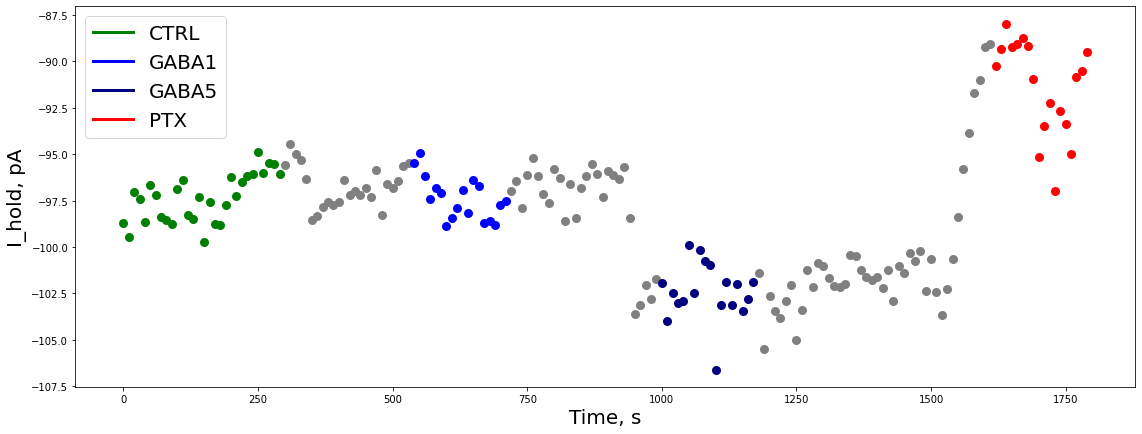

In [30]:
fig, ax = plt.subplots(1, figsize=(19, 7))
for k, v in distribution_param_sweep.items():
    x_k = [k * sweep_length + i / SamplingRate for i in range(len(v))]
    col='grey'
    for c_k, c_v in colors.items():
        if k == c_v[0]:
            col = c_v[2]
            plt.plot(x_k[0], v[0], color=col, linewidth=3, label=c_k)
        if k > c_v[0] and k < c_v[1]:
            col = c_v[2]
    plt.scatter(x_k[0], v[0], color=col, linewidth=3)
plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('I_hold, pA', fontdict={'fontsize': 20})

plt.legend(fontsize=20)
plt.show()

fig.savefig(f"{FILENAME.split('.abf')[0]}/Ihold.png")
fig.savefig(f"{FILENAME.split('.abf')[0]}/Ihold.pdf")

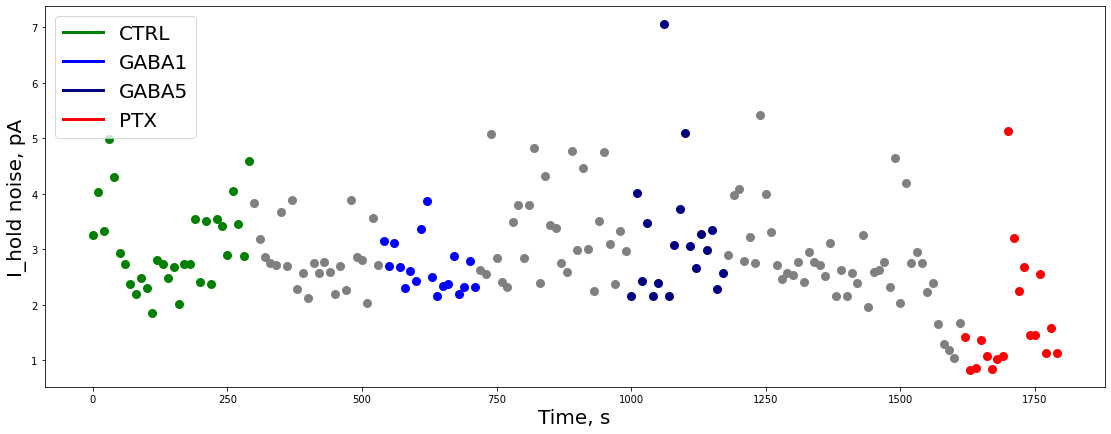

In [31]:
fig, ax = plt.subplots(1, figsize=(19, 7))
for k, v in distribution_param_sweep.items():
    x_k = [k * sweep_length + i / SamplingRate for i in range(len(v))]
    col='grey'
    for c_k, c_v in colors.items():
        if k == c_v[0]:
            col = c_v[2]
            plt.plot(x_k[0], v[1], color=col, linewidth=3, label=c_k)
        if k > c_v[0] and k < c_v[1]:
            col = c_v[2]
    plt.scatter(x_k[0], v[1], color=col, linewidth=3)
plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('I_hold noise, pA', fontdict={'fontsize': 20})

plt.legend(fontsize=20)
plt.show()

fig.savefig(f"{FILENAME.split('.abf')[0]}/Inoise.png")
fig.savefig(f"{FILENAME.split('.abf')[0]}/Inoise.pdf")

In [32]:
baseline_export = pd.DataFrame(baseline[0], columns = ['I, pA'])
baseline_export.to_csv(f"{FILENAME.split('.abf')[0]}/_baseline.csv", index=True)

In [33]:
Ihold = []
Inoise = []
for k in range(Sweep_number):
    Ihold.append(distribution_param_sweep[k][0])
    Inoise.append(distribution_param_sweep[k][1])
baseline_param = pd.DataFrame(Ihold, columns = ['Ihold, pA'])
baseline_param['Inoise, pA'] = Inoise
baseline_param['sweep_indx'] = [i for i in range(Sweep_number)]
baseline_param['series'] = baseline_param.sweep_indx.apply(sweep_seria_correspondence)
baseline_param.to_csv(f"{FILENAME.split('.abf')[0]}/_baseline_param.csv", index=True)

Tonic current

In [34]:
temp_tonic_cur = {k: [] for k in colors.keys()}
for k in temp_tonic_cur.keys():
    for j in range(Sweep_number):
        if  colors[k][0] <= j <= colors[k][1]:
            temp_tonic_cur[k].append(distribution_param_sweep[j][0])
            
mean_hold_cur = {k: np.array(temp_tonic_cur[k]).mean() for k in temp_tonic_cur.keys()}
tonic_cur = [mean_hold_cur[k] - mean_hold_cur['CTRL'] for k in mean_hold_cur.keys() if k != 'CTRL']

In [35]:
ton_cur = pd.DataFrame(tonic_cur, columns = ['Iton, pA'])
ton_cur.to_csv(f"{FILENAME.split('.abf')[0]}/_tonic_cur.csv", index=True)

Low-pass filtering (1, 90 and 1, 20 or 1, 50)

In [36]:
t = times
sig = corrected_signal
sos = signal.butter(1, 50, 'lp', fs=SamplingRate, output='sos')
filtered_signal = signal.sosfilt(sos, sig) #filter whole signal

In [37]:
filtered_signal_dict = {} #filter sweeps
for k in corrected_signal_sweeps_no_res_part.keys():
    sig = corrected_signal_sweeps_no_res_part[k]
    sos = signal.butter(1, 50, 'lp', fs=SamplingRate, output='sos')
    filtered_signal_dict[k] = signal.sosfilt(sos, sig)

### Event detection

Threshold finding

In [38]:
sigma = mad_std(corrected_signal)

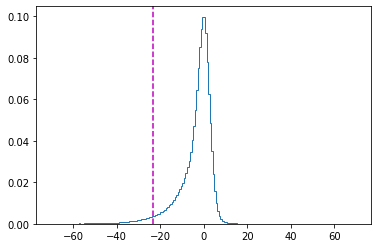

In [39]:
_ = plt.hist(corrected_signal, 200, density=True, range = (-70,70), histtype='step');
plt.axvline(-sigma*5, color='m', ls='--');

Event detection in filtered signal 

In [40]:
block4.segments[0].analogsignals[0].base[:] = block3.segments[0].analogsignals[0].units * filtered_signal.reshape(-1, 1)
events_times_reset = {}
for i in range(Sweep_number):
    if i < Sweep_number - 1:
        a = block4.segments[0].time_slice((i * sweep_length + 0.7) * pq.s, (i * sweep_length + sweep_length) * pq.s, reset_time=False)
    else:
        a = block4.segments[0].time_slice((i * sweep_length + 0.7) * pq.s, reset_time=False)
    Train_times = elephant.spike_train_generation.peak_detection(a.analogsignals[0], threshold = -sigma*5 * pq.pA, sign='below', as_array=True)
    events_times_reset[i] = Train_times
events_inds_reset = {i: np.around(events_times_reset[i] * SamplingRate).astype(int)
                    for i in range(Sweep_number)}

Event detection in not filtered signal

In [41]:
block2.segments[0].analogsignals[0].base[:] = block2.segments[0].analogsignals[0].units * baseline[0].reshape(-1, 1)
corrected_signal_neo = block.segments[0].analogsignals[0] - block2.segments[0].analogsignals[0]
events_times_cor = {}
for i in range(Sweep_number):
    if i < Sweep_number-1:
        a =corrected_signal_neo.time_slice((i * sweep_length + 0.7) * pq.s, (i * sweep_length + sweep_length) * pq.s)
    else:
        a = corrected_signal_neo.time_slice((i * sweep_length + 0.7) * pq.s, None)
    Train_times = elephant.spike_train_generation.peak_detection(a, threshold = -sigma*5 * pq.pA, sign='below',
                                                                 as_array=True)
    events_times_cor[i] = Train_times[:-1]
    
events_inds_cor = {i: np.around(events_times_cor[i] * SamplingRate).astype(int)
                  for i in range(Sweep_number)}

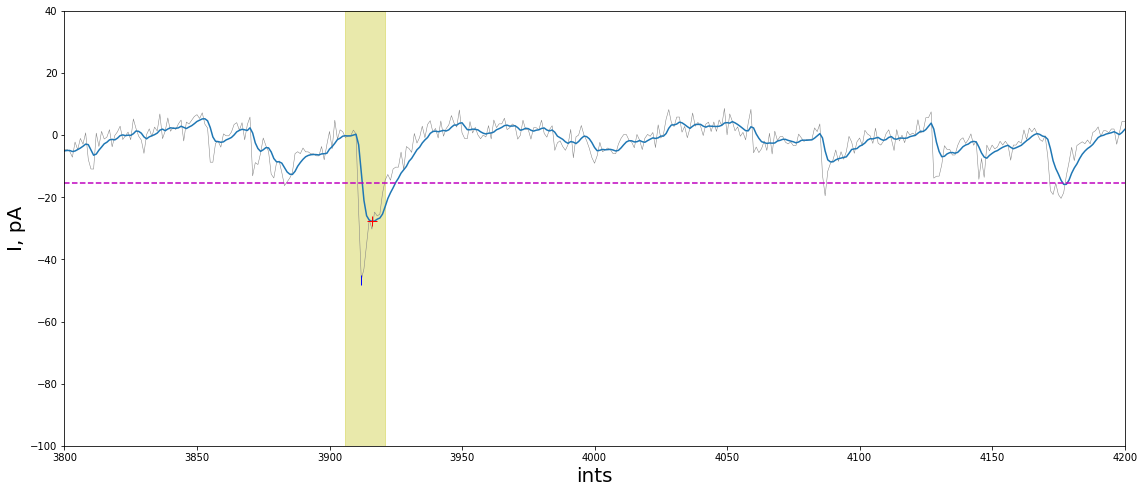

In [42]:
plt.figure(figsize=(19,8))
plt.plot(corrected_signal,'gray',lw=0.5)
plt.plot(filtered_signal)
plt.xlim(3800,4200)
plt.ylim(-100,40)
plt.plot(events_inds_reset[0], filtered_signal[events_inds_reset[0]], "+", ms='10', color='r')
plt.plot(events_inds_cor[0], corrected_signal[events_inds_cor[0]], "|", ms='10', color='b')


for j in events_inds_reset[0]:
    plt.axvspan(j-10,j+5, color='y', alpha=0.33, zorder=-1)

plt.axhline(-sigma*3.3, color='m', ls='--' )
plt.xlabel('ints', fontdict={'fontsize': 20})
plt.ylabel('I, pA', fontdict={'fontsize': 20})
plt.show()

In [43]:
SpikeTrainInd = defaultdict(list) #correspondence between filtered and not filtered signals
for k in range(Sweep_number):
    prevbel = 0
    prev_ind = 0
    for rel in events_inds_reset[k]:
        for i in range(prev_ind, len(events_inds_cor[k])):
            bel = events_inds_cor[k][i]
            if bel > rel:
                SpikeTrainInd[k].append(prevbel)
                prev_ind = i - 1
                break
            prevbel = bel

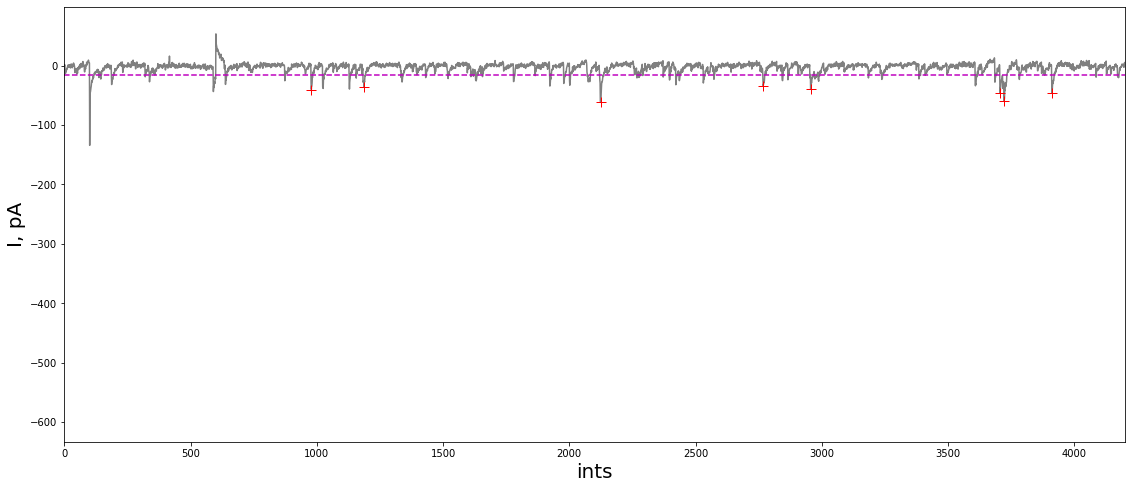

In [44]:
plt.figure(figsize=(19,8))
plt.plot(corrected_signal,'gray',lw=1.5)
plt.xlim(0,4200)
# plt.ylim(-100,40)
plt.plot(SpikeTrainInd[0], corrected_signal[SpikeTrainInd[0]], "+", ms='10', color='r')

plt.axhline(-sigma*3.3, color='m', ls='--' )
plt.xlabel('ints', fontdict={'fontsize': 20})
plt.ylabel('I, pA', fontdict={'fontsize': 20})
plt.show()

### Parametres 

Spike selection

In [45]:
Sp_for_ampl = {k: [] for k in range(Sweep_number)}
for k in range(Sweep_number):
    for i in range(len(SpikeTrainInd[k])):
        Sp_for_ampl[k].append(int(SpikeTrainInd[k][i]))

In [46]:
ampls_spks = {k: corrected_signal[Sp_for_ampl[k]]
           for k in range(Sweep_number)}

In [47]:
widths = {} #5ms <= tau_decay <= 40 mc
right_ips_times = {}
for k in range(Sweep_number):
    widths[k], right_ips_times[k] = half_width(corrected_signal * (-1), SpikeTrainInd[k], block)

In [48]:
tau_decay = {k: np.zeros(len(SpikeTrainInd[k])) for k in range(Sweep_number)}
for k in range(Sweep_number):
    if len(SpikeTrainInd[k]) != 0:
        for l in range(len(tau_decay[k])):
            x = []
            y = []
            Amax = ampls_spks[k][l]
            for i in range(SpikeTrainInd[k][l], int(right_ips_times[k][l] * SamplingRate) + 2):
                if corrected_signal[i] / Amax < 1 and corrected_signal[i] / Amax > 0:
                    y.append(corrected_signal[i] / Amax)
                    x.append(i/SamplingRate)
                else:
                    continue

            x, y = np.array(x), np.array(y)
            if len(x) > 0:
                coef, b = np.polyfit(x, np.log(np.array(y)), 1, w=np.sqrt(np.array(y)))
                tau_dec = (- 1 / coef + x[0] / b) / 2
                leng = len(x)
                while tau_dec < 0 and leng > 1:
                    leng = int(leng / 1.5)
                    x, y = x[:leng], y[:leng]
                    coef, b = np.polyfit(x, np.log(np.array(y)), 1, w=np.sqrt(np.array(y)))
                    tau_dec = (- 1 / coef + x[0] / b) / 2
                tau_decay[k][l] = tau_dec
            else:
                tau_decay[k][l] = None
    else:
        tau_decay[k] = []
    tau_decay[k] = tau_decay[k]*1000

In [49]:
NewSpikeTrainInd = {} 
for k in tau_decay.keys():
    NewSpikeTrainInd[k] = []
    for i in range(len(tau_decay[k])):
        if 5 <= tau_decay[k][i] <= 40:
            NewSpikeTrainInd[k].append(SpikeTrainInd[k][i])
        else:
            continue

Frequency, Hz

In [50]:
time_len_sweeps = {k: len(corrected_signal_sweeps_no_res_part)*SamplingRate
           for k in range(Sweep_number)}
freqs = {k: len(NewSpikeTrainInd[k]) *1000 / time_len_sweeps[k]
           for k in range(Sweep_number)}

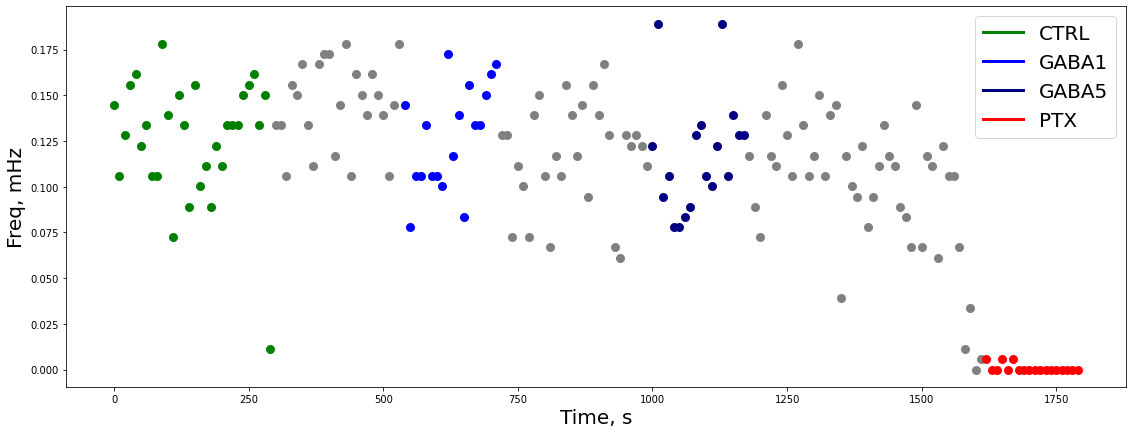

In [51]:
plt = plot_el_param(freqs, sweep_length, SamplingRate, colors)
plt.ylabel('Freq, mHz', fontdict={'fontsize': 20})
plt.show()

fig.savefig(f"{FILENAME.split('.abf')[0]}/freq.png")
fig.savefig(f"{FILENAME.split('.abf')[0]}/freq.pdf")

In [65]:
spont_freqs = {k: 1 / elephant.statistics.isi(NewSpikeTrainInd[k])
           for k in range(Sweep_number)}

spont_frequencies = pd.DataFrame.from_dict(spont_freqs, orient='index')
spont_frequencies['sweep'] = spont_freqs.keys()

In [66]:
start_sweep = [k * sweep_length * SamplingRate for k in range(Sweep_number)]
stop_sweep = [(k+1) * sweep_length * SamplingRate for k in range(Sweep_number)]

In [67]:
spont_frequencies['ser'] = spont_frequencies.sweep.apply(sweep_seria_correspondence)

Amplitude of each spike, pA

In [56]:
Sp_for_ampl = {k: [] for k in range(Sweep_number)}
for k in range(Sweep_number):
    for i in range(len(NewSpikeTrainInd[k])):
        Sp_for_ampl[k].append(int(NewSpikeTrainInd[k][i]))
        
ampls_spks = {k: corrected_signal[Sp_for_ampl[k]]
           for k in range(Sweep_number)}

ampls_spks_pos = {}
for k in range(Sweep_number):
    ampls_spks_pos[k] = ampls_spks[k] * (-1)
    
SpikeTrainTimes = {k: [] for k in range(Sweep_number)}
for k in range(Sweep_number):
    SpikeTrainTimes[k] = np.array(NewSpikeTrainInd[k]) / SamplingRate

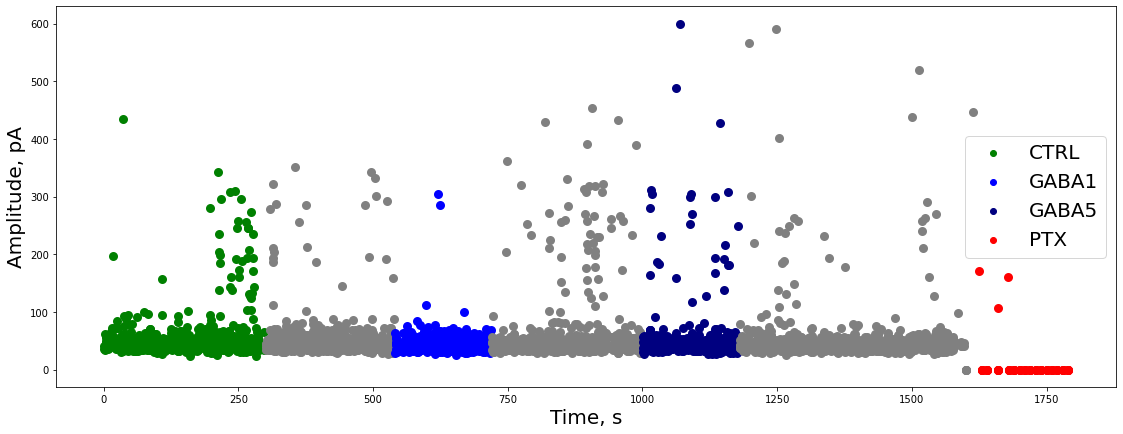

In [57]:
plt = plt_event_param(ampls_spks_pos, colors, sweep_length, SpikeTrainTimes)

fig.savefig(f"{FILENAME.split('.abf')[0]}/ampl.png")
fig.savefig(f"{FILENAME.split('.abf')[0]}/ampl.pdf")

Tau decay

In [58]:
widths = {}
right_ips_times = {}
for k in range(Sweep_number):
    widths[k], right_ips_times[k] = half_width(corrected_signal * (-1), NewSpikeTrainInd[k], block)

In [59]:
tau_decay = {k: np.zeros(len(NewSpikeTrainInd[k])) for k in range(Sweep_number)}
for k in range(Sweep_number):
    if len(NewSpikeTrainInd[k]) != 0:
        for l in range(len(tau_decay[k])):
            x = []
            y = []
            Amax = ampls_spks[k][l]
            for i in range(NewSpikeTrainInd[k][l], int(right_ips_times[k][l] * SamplingRate) + 2):
                if corrected_signal[i] / Amax < 1 and corrected_signal[i] / Amax > 0:
                    y.append(corrected_signal[i] / Amax)
                    x.append(i/SamplingRate)
                else:
                    continue

            x, y = np.array(x), np.array(y)
            if len(x) > 0:
                coef, b = np.polyfit(x, np.log(np.array(y)), 1, w=np.sqrt(np.array(y)))
                tau_dec = (- 1 / coef + x[0] / b) / 2
                leng = len(x)
                while tau_dec < 0 and leng > 1:
                    leng = int(leng / 1.5)
                    x, y = x[:leng], y[:leng]
                    coef, b = np.polyfit(x, np.log(np.array(y)), 1, w=np.sqrt(np.array(y)))
                    tau_dec = (- 1 / coef + x[0] / b) / 2
                tau_decay[k][l] = tau_dec
            else:
                tau_decay[k][l] = None
    else:
        tau_decay[k] = []
    tau_decay[k] = tau_decay[k]*1000

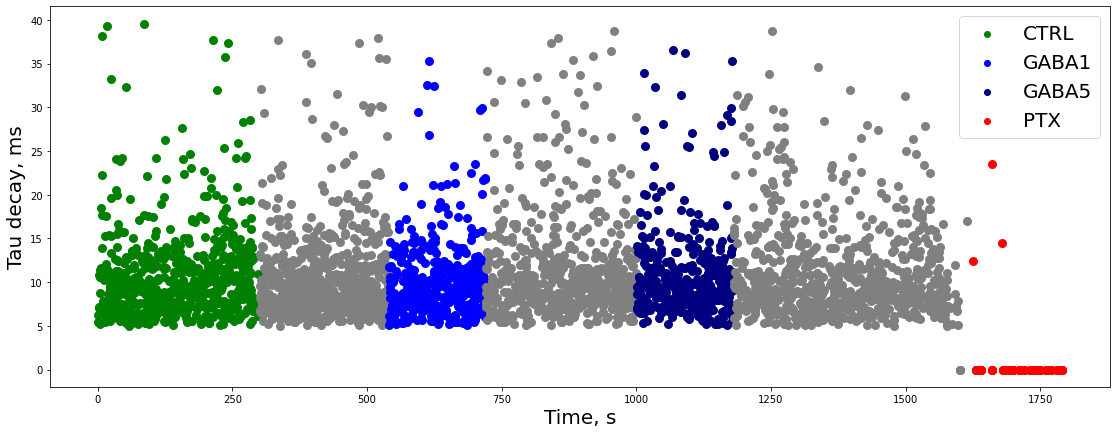

In [60]:
plt = plt_event_param(tau_decay, colors, sweep_length, SpikeTrainTimes)
plt.ylabel('Tau decay, ms', fontdict={'fontsize': 20})

fig.savefig(f"{FILENAME.split('.abf')[0]}/taudec.png")
fig.savefig(f"{FILENAME.split('.abf')[0]}/taudec.pdf")

Rise Rate

In [61]:
rise_rate = {k: rise_rate(corrected_signal * (-1), NewSpikeTrainInd[k], block)
             for k in range(Sweep_number)}
for k in range(Sweep_number):
    rise_rate[k] = np.array(rise_rate[k])[0]

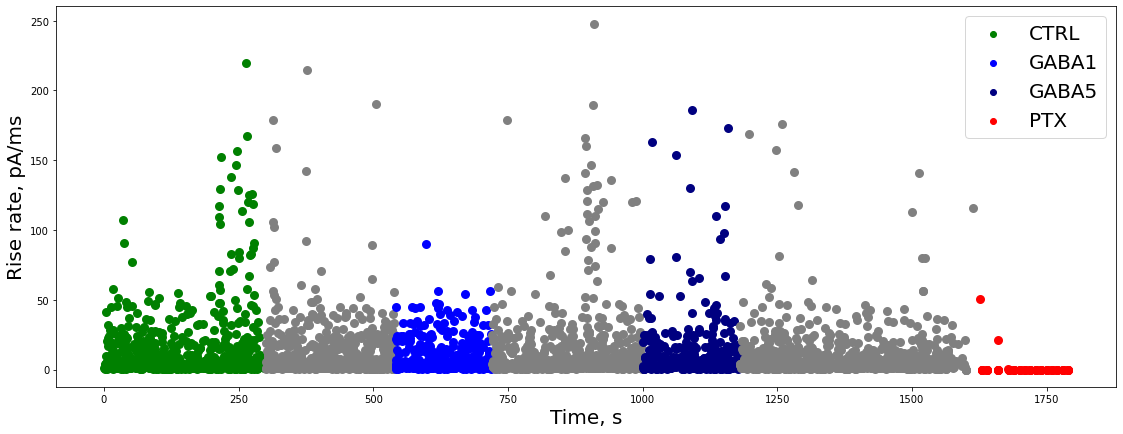

In [62]:
plt = plt_event_param(rise_rate, colors, sweep_length, SpikeTrainTimes)
plt.ylabel('Rise rate, pA/ms', fontdict={'fontsize': 20})
plt.show()

fig.savefig(f"{FILENAME.split('.abf')[0]}/riserate.png")
fig.savefig(f"{FILENAME.split('.abf')[0]}/riserate.pdf")

Results

In [63]:
event_param = pd.DataFrame(np.concatenate(list(NewSpikeTrainInd.values())), columns=['event_idx'])
event_param['spike_time'] = np.round(np.concatenate(list(SpikeTrainTimes.values())), 3)
event_param['amplitudes'] = np.round(np.concatenate(list(ampls_spks_pos.values())), 3)
event_param['tau_decay'] = np.round(np.concatenate(list(tau_decay.values())), 3)
event_param['rise_rate_10_90'] = np.round(np.concatenate(list(rise_rate.values())), 3)

In [70]:
start_sweep = [k * sweep_length * SamplingRate for k in range(Sweep_number)]
stop_sweep = [(k+1) * sweep_length * SamplingRate for k in range(Sweep_number)]

In [83]:
def sweep_numeration(x):
    results_keys = [k for k in range(Sweep_number)]
    for i in range(len(start_sweep)):
        if start_sweep[i] <= x <= stop_sweep[i]:
            return results_keys[i]

In [89]:
event_param['sweep'] = event_param.event_idx.apply(sweep_numeration)
event_param['series'] = event_param.sweep.apply(sweep_seria_correspondence)
event_param.to_csv(f"{FILENAME.split('.abf')[0]}/event_param.csv", index=True)

In [90]:
event_param_ctrl = event_param[event_param['series'] == 'CTRL']
event_param_gaba1 = event_param[event_param['series'] == 'GABA1']
event_param_gaba5 = event_param[event_param['series'] == 'GABA5']

In [93]:
frames = [event_param_ctrl, event_param_gaba1, event_param_gaba5]
res = pd.concat(frames) #without picro

In [94]:
res.to_csv(f"{FILENAME.split('.abf')[0]}/event_param_3_series.csv", index=True)

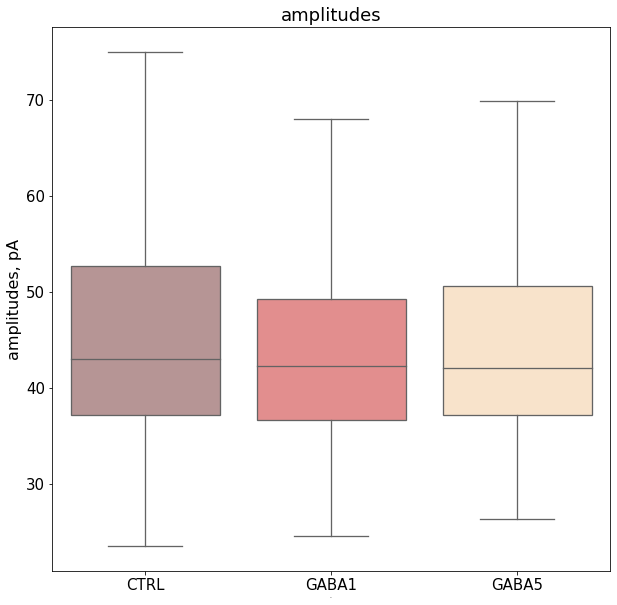

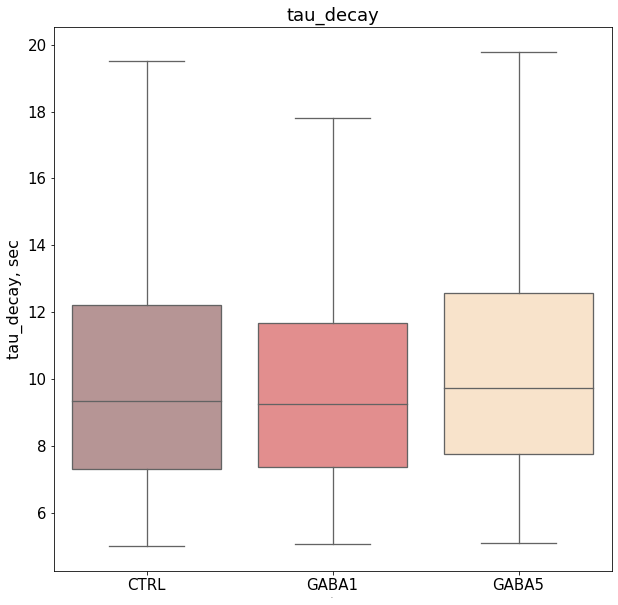

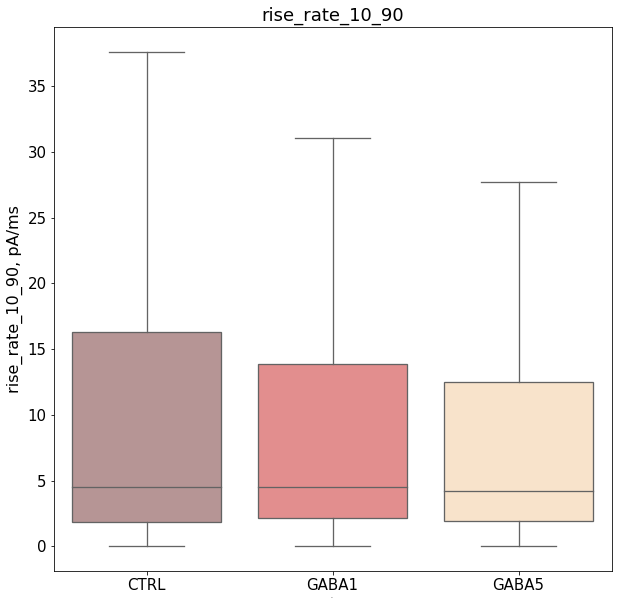

In [95]:
parametres = ['amplitudes', 'tau_decay', 'rise_rate_10_90']
lparametres = ['amplitudes, pA', 'tau_decay, sec', 'rise_rate_10_90, pA/ms']

for p, l in zip(parametres, lparametres):
    plt.figure(figsize = (10, 10))
    ax = sns.boxplot(x='series', y=p, data=res, palette  = ['rosybrown', 'lightcoral', 'bisque', 'paleturquoise'],
                     linewidth = 1.3, showfliers=False)
    #ax.set_title(p)
    ax.set_title(p, fontsize=18)
    ax.set_xlabel('series', fontsize=0)
    ax.set_ylabel(l, fontsize=16);
    plt.xticks(fontsize=15, rotation=0)
    plt.yticks(fontsize=15, rotation=0)
    plt.savefig(f"{FILENAME.split('.abf')[0]}/{p}.png")
    plt.savefig(f"{FILENAME.split('.abf')[0]}/{p}.pdf")
plt.show();

In [96]:
s_f_ctrl = spont_frequencies.loc[spont_frequencies['ser'] == 'CTRL'].to_numpy()
s_f_gaba1 = spont_frequencies.loc[spont_frequencies['ser'] == 'GABA1'].to_numpy()
s_f_gaba5 = spont_frequencies.loc[spont_frequencies['ser'] == 'GABA5'].to_numpy()

In [97]:
spont_frequencies_ctrl = []
for i in range(len(s_f_ctrl)):
    for j in range(len(s_f_ctrl[i])):
        if type(s_f_ctrl[i][j]) == float:
            spont_frequencies_ctrl.append(s_f_ctrl[i][j])
            
spont_frequencies_gaba1 = []
for i in range(len(s_f_gaba1)):
    for j in range(len(s_f_gaba1[i])):
        if type(s_f_gaba1[i][j]) == float:
            spont_frequencies_gaba1.append(s_f_gaba1[i][j])
            
spont_frequencies_gaba5 = []
for i in range(len(s_f_gaba5)):
    for j in range(len(s_f_gaba5[i])):
        if type(s_f_gaba5[i][j]) == float:
            spont_frequencies_gaba5.append(s_f_gaba5[i][j])

In [98]:
spont_frequencies_ctrl_no_nan = [item for item in spont_frequencies_ctrl if not(math.isnan(item)) == True]
spont_frequencies_gaba1_no_nan = [item for item in spont_frequencies_gaba1 if not(math.isnan(item)) == True]
spont_frequencies_gaba5_no_nan = [item for item in spont_frequencies_gaba5 if not(math.isnan(item)) == True]

In [99]:
spont_fr_ctrl = pd.DataFrame(spont_frequencies_ctrl_no_nan, columns=['spont_freq'])
spont_fr_ctrl['series'] = ['CTRL'] * len(spont_fr_ctrl)
spont_fr_gaba1 = pd.DataFrame(spont_frequencies_gaba1_no_nan, columns=['spont_freq'])
spont_fr_gaba1['series'] = ['GABA1'] * len(spont_fr_gaba1)
spont_fr_gaba5 = pd.DataFrame(spont_frequencies_gaba5_no_nan, columns=['spont_freq'])
spont_fr_gaba5['series'] = ['GABA5'] * len(spont_fr_gaba5)

In [100]:
spont_freq = pd.concat([spont_fr_ctrl, spont_fr_gaba1, spont_fr_gaba5])

In [101]:
spont_freq.to_csv(f"{FILENAME.split('.abf')[0]}/spont_freqs.csv", index=True)

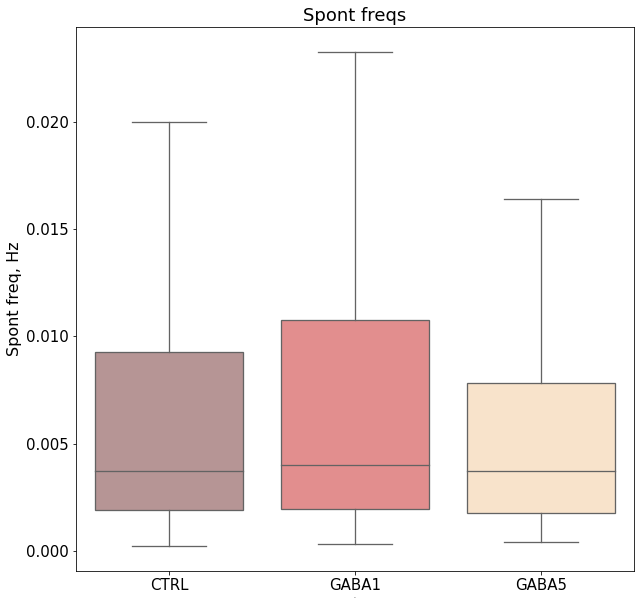

In [102]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(x='series', y='spont_freq', data=spont_freq, palette  = ['rosybrown', 'lightcoral', 'bisque', 'paleturquoise'],
                     linewidth = 1.3, showfliers=False)
ax.set_title('Spont freqs', fontsize=18)
ax.set_xlabel('series', fontsize=0)
ax.set_ylabel('Spont freq, Hz', fontsize=16);
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.savefig(f"{FILENAME.split('.abf')[0]}/{'spont freq'}.png")
plt.savefig(f"{FILENAME.split('.abf')[0]}/{'spont freq'}.pdf")
plt.show();

Cumulative distribution

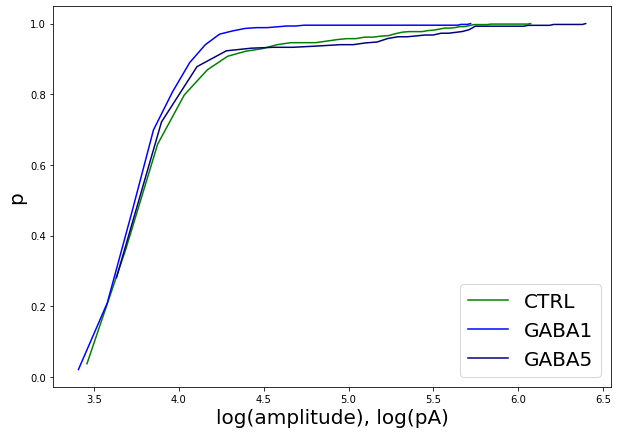

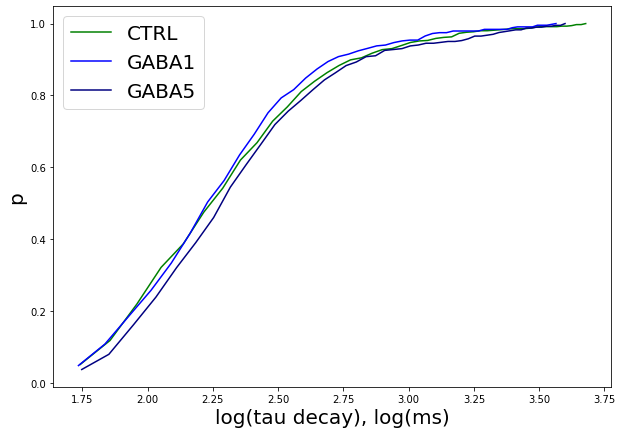

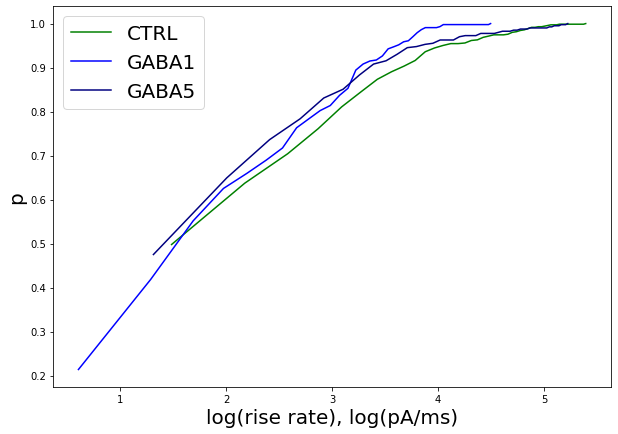

In [103]:
column = ['amplitudes', 'tau_decay', 'rise_rate_10_90']
llabel = ['log(amplitude), log(pA)', 'log(tau decay), log(ms)','log(rise rate), log(pA/ms)']


for c, l in zip(column, llabel):
    count, bins_count = np.histogram(np.array(res[res['series'] == 'CTRL'][c]), bins=50)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    fig, ax = plt.subplots(1, figsize=(10, 7))
    plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

    count, bins_count = np.histogram(np.array(res[res['series'] == 'GABA1'][c]), bins=50)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

    count, bins_count = np.histogram(np.array(res[res['series'] == 'GABA5'][c]), bins=50)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

    plt.ylabel('p', fontdict={'fontsize': 20})
    plt.xlabel(f'{l}', fontdict={'fontsize': 20})
    plt.legend(fontsize=20)
    fig.savefig(f"{FILENAME.split('.abf')[0]}/cum_distr {c}.png")
    fig.savefig(f"{FILENAME.split('.abf')[0]}/cum_distr {c}.pdf")
    plt.show()

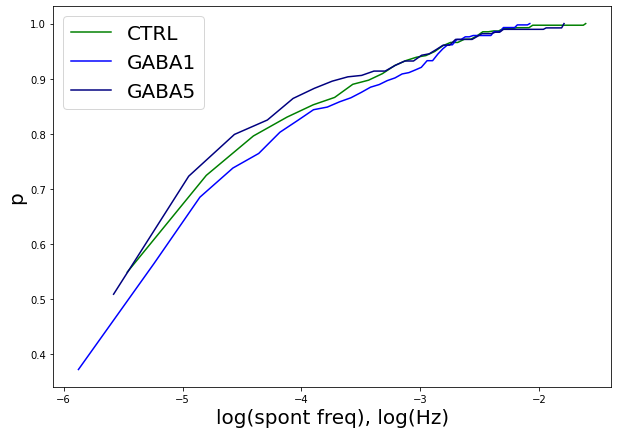

In [104]:
count, bins_count = np.histogram(np.array(spont_freq[spont_freq['series'] == 'CTRL']['spont_freq']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(spont_freq[spont_freq['series'] == 'GABA1']['spont_freq']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(spont_freq[spont_freq['series'] == 'GABA5']['spont_freq']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('log(spont freq), log(Hz)', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
fig.savefig(f"{FILENAME.split('.abf')[0]}/cum_distr_spont_freq.png")
fig.savefig(f"{FILENAME.split('.abf')[0]}/cum_distr_spont_freq.pdf")
plt.show()